# Box plots: An investigation into box plots and their use

### Notebook structure
The notebook is split up into the following sections which are based on the project problem statement. 

* Section One - Getting started with all necessary python libraries/packages
* Section Two - Summarise the history of the box plot and situations in which it is used.
* Section Three - Demonstrate the use of the box plot using data of your choosing.
* Section Four - Explain any relevant terminology such as the terms quartile and percentile.
* Section Five - Compare the box plot to alternatives.
* Section Six - references and conclusion

### Section one - general set up
The following Python packages are imported for use in this notebook:
* Mathplotlib.pyplot.py [Mathplotlib.org](https://matplotlib.org). Matplotlib is a Python plotting library and Pyplot is a matplotlib module which provides a MATLAB type interface.
* NumPy [NumPy](http://www.numpy.org/). NumPy is a Python package for mathemical computing.
* Seaborn [Seaborn](https://seaborn.pydata.org). Seaborn is a Python package used for plotting data.
* Pandas [Pandas](https://pandas.pydata.org). Pandas is a Python package for use with data frames.


In [10]:
#command below ensures plots display correctly in the notebook
%matplotlib inline
#below imports all necessary python packages for this notebook
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

### Section Two - Summarise the history of the box plot and situations in which it is used.

Boxplots were first used in 1969 by mathematician [John Tukey](https://en.wikipedia.org/wiki/John_Tukey). 

They are used to show the distribution of data and show the following five points
* data minimum
* first quartile
* median
* third quartile
* maximum.

A boxplotvconsist of a rectangular box with whiskers extending from each end to the mimimum and maximum data points. The rectangle itself goes from the first quartile to the third quartile (called the interquartile range) and a line within the box shows the median value of the data. It allows a simple but highly visually effective method of displaying and comparing data distributions. 

Box plots are used to

### Section Three - Demonstrate the use of the box plot using data of your choosing.

For this I decided to use a few simple examples based on CAO points. 

Each year Irish Students undergo a state examination called the Leaving Certificate, see a wikipedia page about the examination here, [Leaving Cert](https://en.wikipedia.org/wiki/Leaving_Certificate_(Ireland)). For these LC students entry to third level courses in Ireland is via a central application system [CAO](http://www.cao.ie/). 

For the purpose of allocating college places Leaving cert results are converted to **applicant points** and Third Level institutions review applicant points & available courses places and determine the mimimum entry points for the course. Course are then allocated to eligible applicants based on their points, in descending order until the course places are all allocated. The **course points** will therefore be the total points obtained by the last applicant allocated a course place.

This method means that course popularity and number of available places can result in points changing from year to year, therefore it is to a large extent an example of supply and demand. 

In the first simulated example below a course had a points requirement in 2016 of 365 with a max points of 530, in 2017 a points requirement of 397 with max 495. Intake is unchanged with 39 places allocated in each year. When plotted as boxplots it is apparent that whilst the overall spread of points and the max were greater in 2016; the 2017 median was higher.

It is demonstrating in 2016 the two common scenarios in CAO points, at the higher end you have a student who has an excess of points but has stuck with the course they want; at the lower end the scenario where the demand was not as high as expected and to fill and make the course viable it is decided to drop points and pull in the last few students in a second round of offers. 

I have also used numpy to calculate the five boxplot points and the interquartile range. 

I then used seaborn to generate the same plot and generated some summary statistics, this is to demonstrate how easily a smart looking plot and summary statistics can be generated by even the most novice of users. 

In the final part of this section I will bring in a second dataset which represents the variation of points for a different programme, program B across six years.


In [45]:
##below I am reading in a file of mocked up CAO points for a course 
df = pd.read_csv("https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/mock%20up%20points.csv", header =0)
#df

Min    201600 365   --- Min    201700 397
Q1     201600 398.5 --- Q1     201700 416.5
Median 201600 419.0 --- Median 201700 434.0
Q3     201600 452.5 --- Q3     201700 465.0
Max    201600 530   --- Max    201700 497

Interquartile range 201600 54.0
Interquartile range 201700 48.5


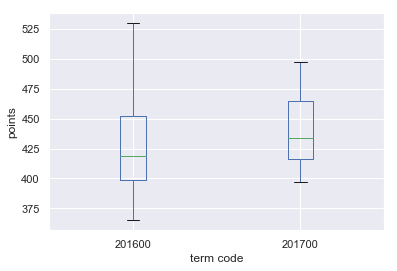

In [46]:
## using mathplotlib I am going to create a boxplot of the dataset
boxplot = df.boxplot(column=['201600','201700'],  return_type='axes')
plt.ylabel('points')
plt.xlabel('term code')
## using numpy I am going to calculate the five points of the box plot and the interquartile range
## minimum
min_pts = np.min(df, axis=0)
print("Min    201600", min_pts[0], "  --- Min    201700",min_pts[1])
## Q1
Q1 =np.percentile(df, 25, axis =0)
print ("Q1     201600", Q1[0], "--- Q1     201700", Q1[1])
## median
med =np.median(df,axis =0)
print ("Median 201600", med[0], "--- Median 201700", med[1])
## Q3
Q3 =np.percentile(df, 75, axis=0)
print ("Q3     201600", Q3[0], "--- Q3     201700", Q3[1])
## Maximum
max_pts = np.max(df, axis=0)
print("Max    201600", max_pts[0], "  --- Max    201700",max_pts[1])
##Inter Quartile Range
IR = Q3-Q1
print()
print("Interquartile range 201600", (IR[0]))
print("Interquartile range 201700", (IR[1]))


,201600,201700
count,39.000000,39.000000
mean,427.076923,440.871795
std,41.050921,30.051867
min,365.000000,397.000000
25%,398.500000,416.500000
50%,419.000000,434.000000
75%,452.500000,465.000000
max,530.000000,497.000000


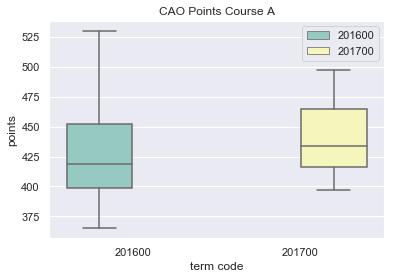

In [47]:
## below I am replicating the above using seaborn.
## I just want to highlight how easily a nice looking plot can be generated.

df1 = pd.DataFrame(data = df, columns = ['201600','201700'])
sns.set(style="darkgrid")
sns.boxplot(x="variable",y = "value", hue = "variable",data=pd.melt(df), palette="Set3").set_title("CAO Points Course A")
plt.legend()
plt.ylabel('points')
plt.xlabel('term code')
# below are descriptive statistics for the data. The min, 25%, 50%, 75% and max are the five points of the boxplot
df.describe()

In [48]:
## I am going to read in as second csv to represent the change in points for a programme across a longer timeframe
## of six years.  
df3 = pd.read_csv("https://raw.githubusercontent.com/Hudsonsue/BOXPLOTS/master/boxplotdata.csv",  header = 0) 
df3.head(2)

,2012,2013,2014,2015,2016,2017
0,410,440,455,455,475,455
1,410,440,460,465,480,460


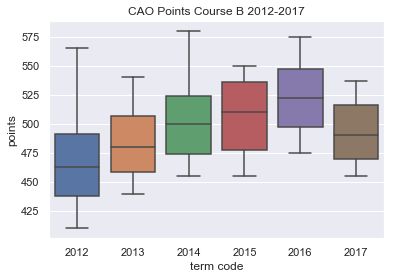

In [49]:
## seaborn box plot of dataset for Course B across six years
df4 = pd.DataFrame(data = df3, columns = [ '2012','2013', '2014', '2015','2016','2017'] )
sns.boxplot(x="variable", y="value", data= pd.melt(df4)).set_title("CAO Points Course B 2012-2017")
plt.ylabel('points')
plt.xlabel('term code')
plt.show()

### Section Four - Explain any relevant terminology such as the terms quartile and percentile.


![Boxplot](http://www.physics.csbsju.edu/stats/simple.box.defs.gif)

For a boxplot data is split into four equal sized groups. 

The lowest 25% goes from the minimum to the first quartile Q1 - the end of the whisker to the bottom of the box. 

The box itself shows the next 50% of data with the median (middle value) marked as a line within the box. 

The top of the box (third quartile Q3) to the end of the top whisker (maximum) represents the top 25% of data.  

The range of data from the Third Quartile to First Quartile (Q3-Q1) is the interquartile range (IQR). 

Any datapoints that are more than 1.5 times the IQR above Q3 or below Q1 may be outliers, datapoints more than 3 times the IQR above Q3 or below Q1 are outliers.

The shape of the boxplot (whisker length and median position) can be used to predict the likely data distribtion. 
. 

### Compare the box plot to alternatives.


As boxplots are distribution plots the first alternative to spring to mind is the histogram, below I have plotted the single programme across two years data as seaborn [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html), both superimposed and side by side.
Whilst it is possible to interpret the plots it is not as visually easy as the box plots, this would be even more apparent where there are six years of data!

I also investigated the use of a [strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html), it shows the distribution of datapoints and it would be useful in conjunction with the box plots.

Doing these comparisons higlighted one major advantage of the boxplot which is that whilst it is lovely in colour colour is not a necessity. 

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


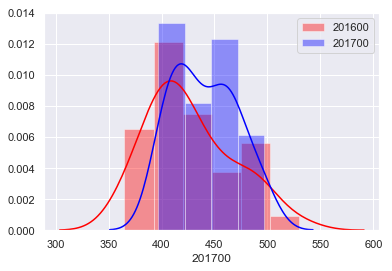

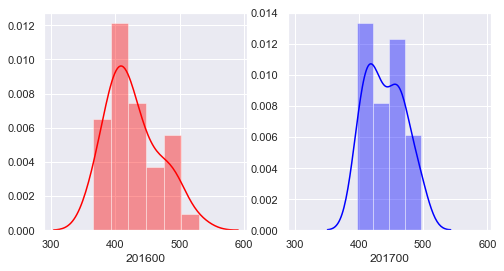

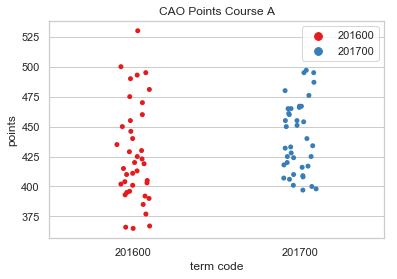

In [8]:
# plot 

sns.distplot(df["201600"], label="201600", color="red")
sns.distplot(df["201700"], label="201700",color="blue")
plt.legend()
plt.show()

f, axes = plt.subplots(1,2, figsize=(8, 4), sharex=True)
sns.distplot( df["201600"] , color="red", ax=axes[0])
sns.distplot( df["201700"] , color="blue", ax=axes[1])
plt.show()

df1 = pd.DataFrame(data = df, columns = ['201600','201700'])
sns.set(style="whitegrid")
sns.stripplot(x="variable",y = "value", hue = "variable",data=pd.melt(df), palette="Set1").set_title("CAO Points Course A")
plt.legend()
plt.ylabel('points')
plt.xlabel('term code') # title of the x axis
plt.show()



### Section Six - references and conclusion

references specific
https://en.wikipedia.org/wiki/Box_plot

https://www.tutorialspoint.com/python/python_box_plots.htm

https://www.mathsisfun.com/data/quartiles.html --reminder of how to work out quartiles!

https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn --assistance with SNS box plot

### END